K-средних (k-means) — это алгоритм машинного обучения без учителя, используемый для разделения набора данных на группы (кластеры). Этот алгоритм стремится найти определенное количество кластеров (k) в наборе данных и определить центры кластеров (центроиды), минимизируя среднее квадратичное расстояние между точками кластера и соответствующими центроидами.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, kmeans_plusplus
from sklearn.metrics import silhouette_score

In [2]:
centers = [[3, 2], [-1, -1], [2, -1], [1,1]]

X, y_true = make_blobs(n_samples=400, centers=centers, cluster_std=0.4, random_state=1)

In [3]:
X

array([[ 1.34502016,  0.58344108],
       [ 2.27360053, -1.14136399],
       [ 2.41603566, -1.36737602],
       [ 0.24189322,  1.03589165],
       [ 1.10915495, -1.67973344],
       [ 1.63018716,  1.48264316],
       [ 1.36833749, -1.33145119],
       [ 0.64052672,  1.12786278],
       [ 1.32641747,  0.75503721],
       [ 3.26361992,  1.34902466],
       [-1.17689171, -0.87058906],
       [ 1.1641063 ,  1.34394839],
       [ 0.80354994,  1.05374925],
       [ 1.92894712, -1.60418255],
       [ 1.44047487, -0.96729287],
       [ 2.01397744, -0.41843297],
       [ 3.07636619,  2.84010205],
       [-0.37647778, -0.95623892],
       [-1.44658801, -0.96762916],
       [ 1.67646112, -0.77702422],
       [ 2.41799776, -0.75659412],
       [ 3.16939774,  2.03093603],
       [ 3.17654578,  1.95993791],
       [-0.65868751, -1.16521172],
       [ 0.57081429,  1.19806344],
       [-1.57635041, -0.50709877],
       [ 2.0679477 , -1.46560319],
       [ 2.25463336, -0.43629864],
       [-0.44448824,

In [4]:
y_true

array([2, 2, 2, 3, 2, 3, 2, 3, 3, 0, 1, 3, 3, 2, 2, 2, 0, 1, 1, 2, 2, 0,
       0, 1, 3, 1, 2, 2, 1, 1, 1, 3, 1, 1, 3, 0, 0, 2, 1, 2, 3, 0, 3, 2,
       3, 0, 1, 3, 0, 1, 1, 2, 0, 2, 0, 3, 3, 1, 1, 0, 2, 3, 2, 0, 1, 1,
       0, 1, 3, 3, 2, 1, 3, 0, 2, 3, 2, 1, 0, 0, 2, 0, 3, 2, 0, 3, 2, 0,
       2, 3, 3, 1, 1, 2, 1, 3, 0, 3, 2, 1, 3, 2, 1, 1, 2, 3, 3, 3, 1, 3,
       2, 2, 0, 0, 0, 3, 1, 1, 1, 2, 2, 0, 0, 3, 3, 0, 2, 1, 3, 2, 0, 1,
       2, 1, 1, 2, 0, 1, 3, 1, 2, 3, 3, 1, 2, 1, 1, 1, 3, 0, 0, 1, 3, 0,
       0, 3, 3, 3, 3, 3, 3, 2, 2, 0, 3, 3, 2, 0, 3, 1, 3, 2, 2, 2, 1, 1,
       1, 2, 2, 0, 1, 1, 0, 3, 0, 0, 1, 1, 1, 2, 3, 0, 3, 0, 3, 2, 2, 2,
       2, 2, 0, 0, 1, 3, 1, 3, 0, 2, 2, 1, 1, 1, 0, 2, 1, 3, 0, 1, 3, 2,
       2, 0, 1, 1, 0, 1, 2, 0, 0, 2, 3, 0, 2, 0, 0, 1, 3, 0, 1, 3, 0, 1,
       3, 1, 0, 2, 0, 2, 0, 3, 2, 3, 3, 1, 2, 0, 2, 0, 0, 3, 3, 2, 3, 3,
       0, 1, 1, 3, 0, 0, 3, 3, 3, 2, 0, 0, 2, 3, 2, 1, 0, 0, 2, 2, 2, 1,
       2, 2, 0, 3, 0, 2, 0, 1, 1, 3, 2, 1, 0, 3, 0,

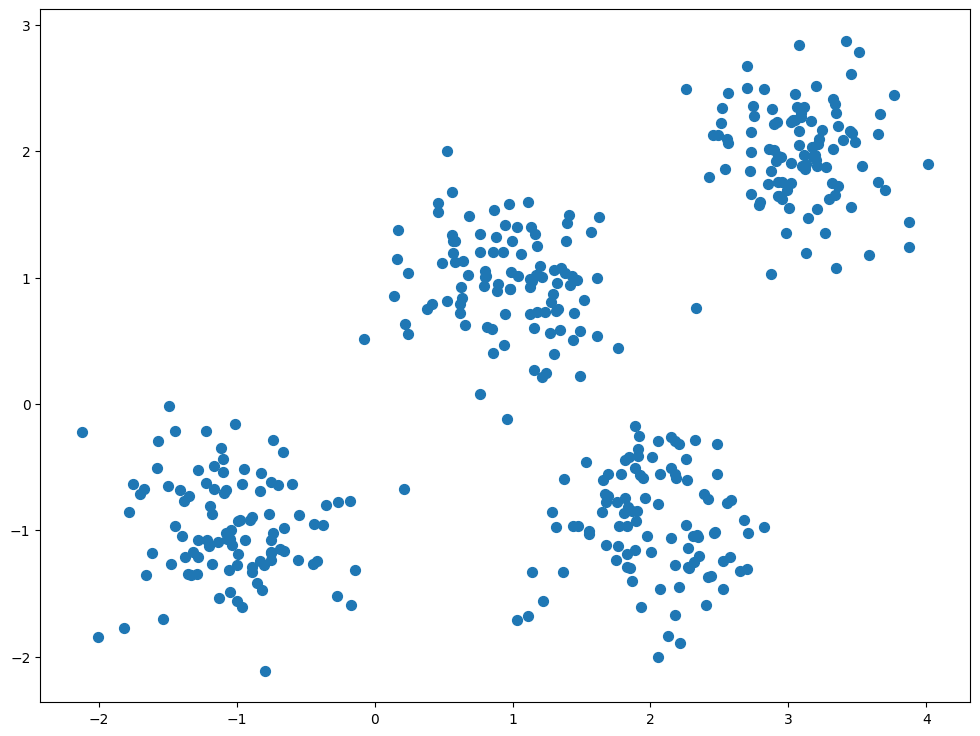

In [5]:
plt.figure(figsize=(12,9))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

In [6]:
pred = KMeans(init='random', n_init = 10).fit_predict(X)

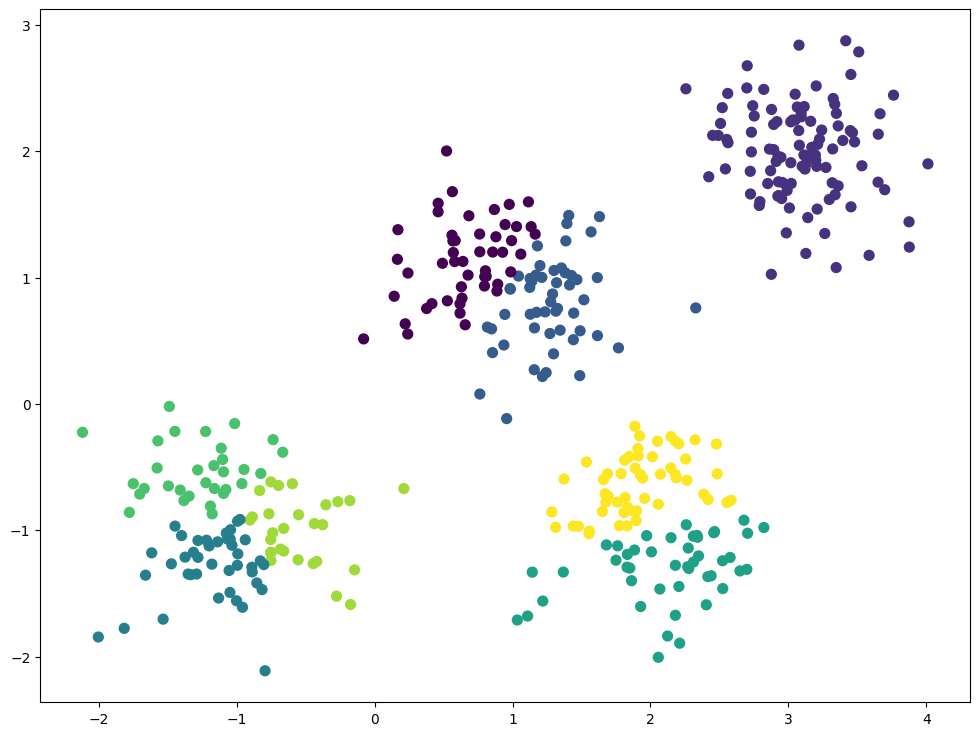

In [7]:
plt.figure(figsize=(12,9))
plt.scatter(X[:, 0], X[:, 1], c=pred, s=50)
plt.show()

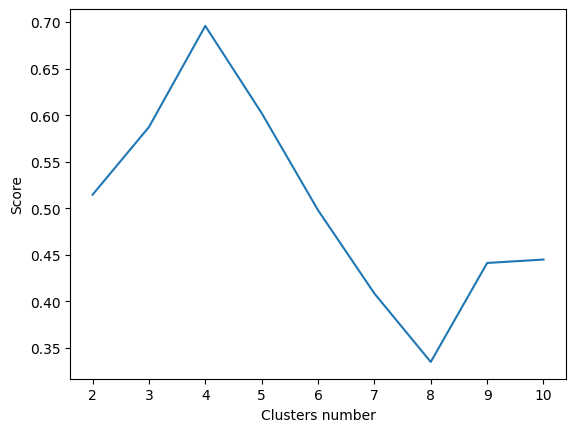

In [8]:
scores = []
for K in range(2,11):
  k_means = KMeans(init='random', n_clusters=K, n_init=10)
  prediction = k_means.fit_predict(X)
  score = silhouette_score(X, prediction)
  scores.append(score)

plt.plot([i for i in range(2,11)], scores)
plt.xlabel('Clusters number')
plt.ylabel('Score')
plt.show()

In [9]:
pred = KMeans(n_clusters=4, init='random', n_init=10).fit_predict(X)

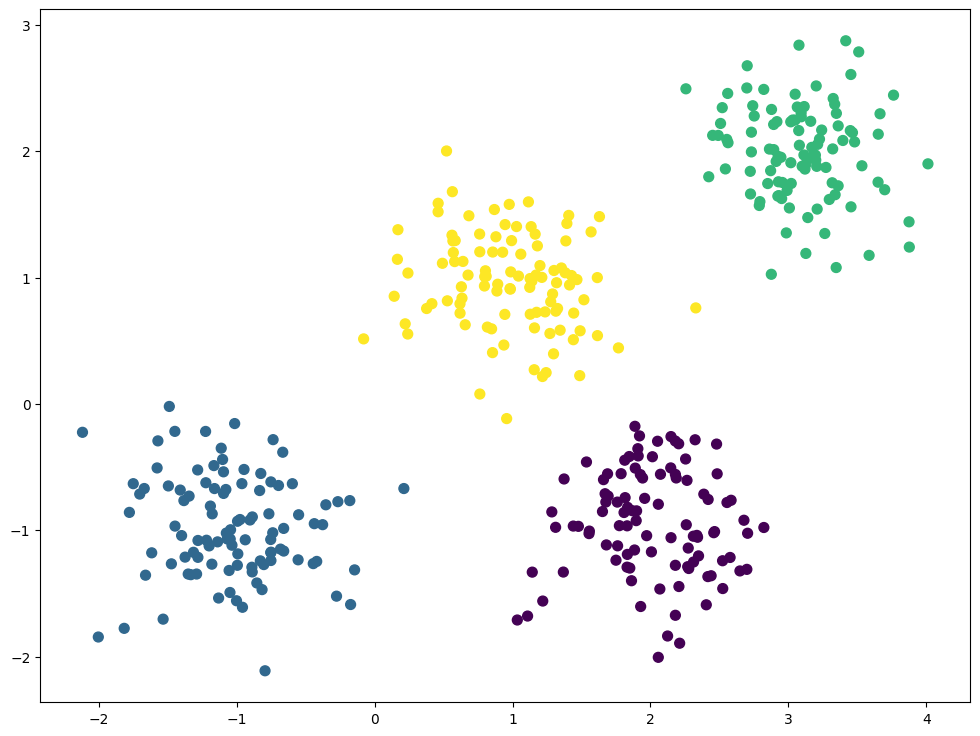

In [10]:
plt.figure(figsize=(12,9))
plt.scatter(X[:, 0], X[:, 1], c=pred, s=50)
plt.show()

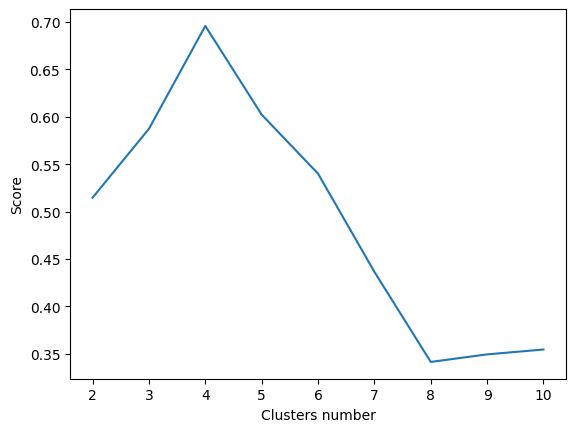

In [11]:
scores = []
for K in range(2,11):
  k_means = KMeans(init='k-means++', n_clusters=K, n_init=10)
  prediction = k_means.fit_predict(X)
  score = silhouette_score(X, prediction)
  scores.append(score)

plt.plot([i for i in range(2,11)], scores)
plt.xlabel('Clusters number')
plt.ylabel('Score')
plt.show()

In [12]:
pred = KMeans(n_clusters=4, init='k-means++', n_init=10).fit_predict(X)

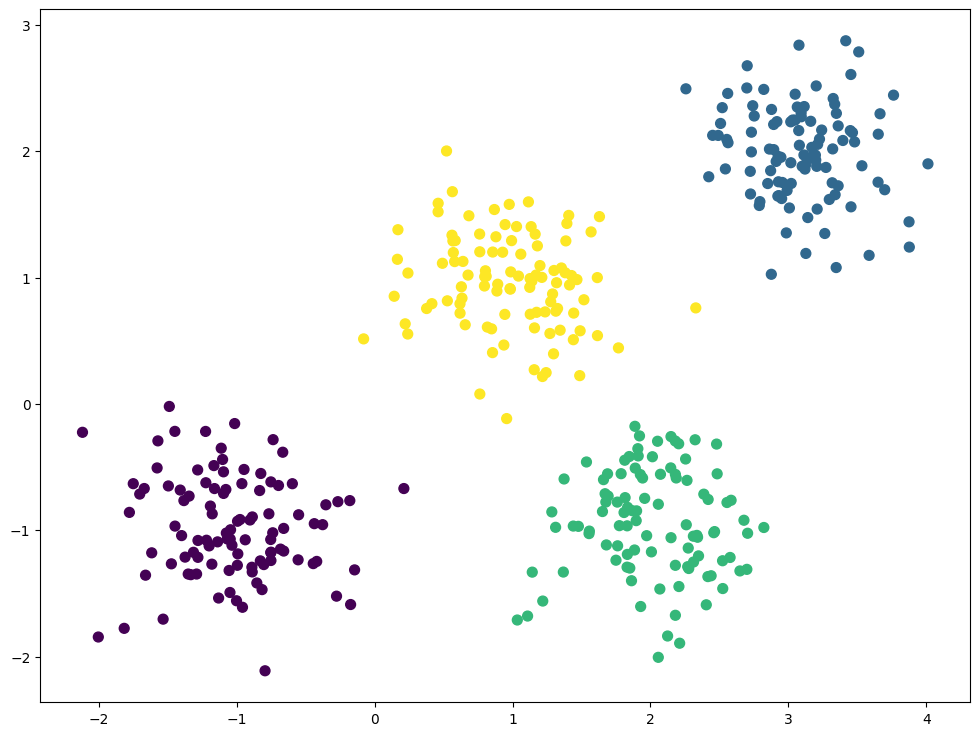

In [13]:
plt.figure(figsize=(12,9))
plt.scatter(X[:, 0], X[:, 1], c=pred, s=50)
plt.show()